In [43]:
from helpers import *
import numpy as np
import pandas as pd
import os
import pickle
from LDA_helpers import process_tweets
import re
from pre_process_text import clean
import gensim
from gensim import corpora, models
import itertools
import pyLDAvis
import pyLDAvis.gensim
import datetime
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = access_folder()
GENERATED_DATA_PATH = access_folder('generated')
print(os.listdir(DATA_PATH))
print(os.listdir(GENERATED_DATA_PATH))

['IRAhandle_tweets_4.csv', 'IRAhandle_tweets_5.csv', 'rus_troll_tweet_stats.csv', 'IRAhandle_tweets_7.csv', 'IRAhandle_tweets_6.csv', 'rus_troll_user.csv', 'IRAhandle_tweets_2.csv', '.DS_Store', 'IRAhandle_tweets_3.csv', 'IRAhandle_tweets_1.csv', 'line_to_author.pickle', 'iran_troll_tweet_stats.csv', 'rus_troll_tweet_text.csv', '.gitignore', 'iran_troll_tweet_text.csv', 'tweet_author_df.pickle', 'iran_troll_user.csv', 'hashtags.txt', 'rus_troll_tweet_metadata.csv', 'iran_troll_tweet_metadata.csv', 'IRAhandle_tweets_8.csv', 'IRAhandle_tweets_9.csv']
['Unknown_tweets.txt', 'cleaned_RightTroll_tweets.txt', 'cleaned_Unknown_tweets.txt', 'cleaned_HashtagGamer_tweets.txt', 'LeftTroll_tweets.txt', 'NonEnglish_tweets.txt', 'NewsFeed_tweets.txt', 'cleaned_Fearmonger_tweets.txt', 'cleaned_NewsFeed_tweets.txt', '.gitignore', 'cleaned_NonEnglish_tweets.txt', 'Fearmonger_tweets.txt', 'HashtagGamer_tweets.txt', 'cleaned_LeftTroll_tweets.txt', 'tweets_n_hashtags.csv', 'RightTroll_tweets.txt']


In [3]:
# loading all data
df_s = []
for file in os.listdir(DATA_PATH):
    if file[-4:] == '.csv' and file[:3] == 'IRA':
        df_s.append(pd.read_csv(DATA_PATH + file))
tweets = pd.concat(df_s)
tweets

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
3,1.674084e+09,GAB1ALDANA,#MyAchillesHeel slippery floors https://t.co/R...,United States,Norwegian,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2160,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer
5,1.674084e+09,GAB1ALDANA,Your opinion on Hillary really matters to a no...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2014,2154,RETWEET,Hashtager,0,1,HashtagGamer
6,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Lilith from Frasier. 0_O,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2156,RETWEET,Hashtager,0,1,HashtagGamer
7,1.674084e+09,GAB1ALDANA,Come find us at the national mall for the #DC ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2157,RETWEET,Hashtager,0,1,HashtagGamer
8,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Trolling celebrities. I have...,United States,English,7/30/2016 20:17,7/30/2016 20:17,3395,2013,2161,RETWEET,Hashtager,0,1,HashtagGamer
9,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Morbid comedy �,United States,English,7/30/2016 20:17,7/30/2016 20:17,3395,2013,2167,RETWEET,Hashtager,0,1,HashtagGamer


In [26]:
# only keeping tweets in English
english_tweets = tweets.loc[tweets['language'] == 'English']
english_tweets.shape

(2128963, 15)

In [5]:
def clean_tweets(df):
    tweets = []
    for tweet in df.content.values:
        tweets.append(clean(tweet))
    return tweets

In [6]:
def series_string_to_datetime (series):
    format_str = '%m/%d/%Y' # The format
    return series.apply(lambda x: datetime.datetime.strptime(x, format_str))

In [27]:
english_tweets['publish_date'] = english_tweets['publish_date'].apply(lambda x: x.split(' ')[0])
english_tweets['publish_date'] = series_string_to_datetime(english_tweets['publish_date'])
english_tweets = english_tweets[(english_tweets['publish_date']>datetime.date(2016,10,1)) & (english_tweets['publish_date']<datetime.date(2016,11,10))] 
english_tweets.shape

(135849, 15)

In [28]:
# clean tweets
english_tweets['Cleaned Tweets'] = clean_tweets(english_tweets)
english_tweets.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,Cleaned Tweets
2161,1.504356e+09,GALLOWAYELIANA,"#CharlotteUprising protests at NFL game, cuts ...",United States,English,2016-10-05,10/5/2016 13:49,1000,1148,1799,RETWEET,left,0,1,LeftTroll,protest nfl game cut sale profit much million
2162,1.504356e+09,GALLOWAYELIANA,Gotta stay high all my life to forget I'm miss...,United States,English,2016-10-05,10/5/2016 13:48,1000,1148,1798,RETWEET,left,0,1,LeftTroll,gotta stay high life forget missing choreograp...
2163,1.504356e+09,GALLOWAYELIANA,How to send the perfect demo https://t.co/3dWa...,United States,English,2016-10-05,10/5/2016 14:51,1000,1148,1803,RETWEET,left,0,1,LeftTroll,send perfect demo
2164,1.504356e+09,GALLOWAYELIANA,Feeling superior hasn't caused an entire race ...,United States,English,2016-10-05,10/5/2016 14:51,1000,1148,1801,RETWEET,left,0,1,LeftTroll,feeling superior caused entire race people suf...
2165,1.504356e+09,GALLOWAYELIANA,Tomm Night at UWI��� Lets do This�� https://t....,United States,English,2016-10-05,10/5/2016 14:51,1000,1148,1802,RETWEET,left,0,1,LeftTroll,tomorrow night let


In [9]:
#clean hash
category_group = english_tweets.groupby('account_category')
txts = []
for category, category_df in category_group:
    txt_path = GENERATED_DATA_PATH  + category +  '_tweets.txt'
    txts.append(category +  '_tweets.txt')
    with open(txt_path, 'w') as f:
        for content in category_df.content.values:
            f.write(content+'\n')

In [10]:
for txt in txts:
    cleaned_txt_path = GENERATED_DATA_PATH  + 'cleaned_'+ txt
    txt_path = GENERATED_DATA_PATH  + txt
    f = open(txt_path)
    with open(cleaned_txt_path, 'w') as c_f:
        for line in f:
            c_f.write(clean(line)+'\n')
    f.close()

In [3]:
def load_and_concatenate(path):
    df = pd.read_csv(path, header=None)
    df.columns = ['Tweet']
    tweets = ''
    for tweet in df.Tweet:
        tweets = tweets + tweet + ' '
    data = {'Tweets': [tweets, np.nan]}
    concatenated_df = pd.DataFrame(data)
    return concatenated_df


In [16]:
df_left_troll = pd.read_csv(GENERATED_DATA_PATH + 'cleaned_LeftTroll_tweets.txt', header=None)
df_left_troll.columns = ['Tweets']
df_right_troll = pd.read_csv(GENERATED_DATA_PATH + 'cleaned_RightTroll_tweets.txt', header=None)
df_right_troll.columns = ['Tweets']
df_hashgamer_troll = pd.read_csv(GENERATED_DATA_PATH + 'cleaned_HashtagGamer_tweets.txt', header=None)
df_hashgamer_troll.columns = ['Tweets']
df_news_troll = pd.read_csv(GENERATED_DATA_PATH + 'cleaned_NewsFeed_tweets.txt', header=None)
df_news_troll.columns = ['Tweets']

In [17]:
df = pd.concat([df_left_troll, df_right_troll, df_hashgamer_troll, df_news_troll], axis=0, ignore_index= True)
df

,Tweets
0,protest nfl game cut sale profit much million
1,gotta stay high life forget missing choreograp...
2,send perfect demo
3,feeling superior caused entire race people suf...
4,tomorrow night let
5,negro time god john youtube
6,god always good plan always
7,couple folk environmental racism tweet hurrica...
8,find cartoon geek application added raven
9,say simple story told never


In [30]:
import warnings
warnings.filterwarnings("ignore")
tweets = english_tweets['Cleaned Tweets'].apply(lambda x: x.split(" "))
dictionary = gensim.corpora.Dictionary(tweets)
dictionary.filter_extremes(no_below= 50,no_above = 0.5)
bow_corpus = [dictionary.doc2bow(doc) for doc in tweets]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
lda_model = gensim.models.LdaModel(corpus_tfidf , num_topics=10, id2word=dictionary)

2161     [protest, nfl, game, cut, sale, profit, much, ...
2162     [gotta, stay, high, life, forget, missing, cho...
2163                                 [send, perfect, demo]
2164     [feeling, superior, caused, entire, race, peop...
2165                                [tomorrow, night, let]
2166                     [negro, time, god, john, youtube]
2167               [god, always, good, plan, always, best]
2168     [couple, folk, environmental, racism, tweet, h...
2169      [find, cartoon, geek, application, added, raven]
2170                     [say, simple, story, told, never]
2171     [issue, hillary, clinton, donald, trump, socia...
2172     [black, men, feel, anxiety, black, men, feel, ...
2173             [mipooh, kdlhawk, thanks, licked, kitten]
2174     [shame, sham, see, black, minister, selling, p...
2175     [please, tell, one, constitutional, legal, rea...
2176     [support, brother, avevo, new, single, bag, ib...
2177     [omg, kid, doing, group, project, mad, tall, a.

In [95]:
lda_model.print_topics(num_words=80)

[(0,
  '0.016*"cop" + 0.016*"killed" + 0.015*"black" + 0.012*"police" + 0.012*"shot" + 0.012*"man" + 0.010*"shooting" + 0.009*"officer" + 0.008*"jail" + 0.008*"head" + 0.008*"protest" + 0.007*"free" + 0.007*"mean" + 0.007*"story" + 0.007*"october" + 0.006*"fall" + 0.006*"beat" + 0.006*"buy" + 0.006*"chance" + 0.006*"book" + 0.006*"world" + 0.006*"meet" + 0.006*"daughter" + 0.006*"special" + 0.006*"fight" + 0.006*"wearing" + 0.005*"mom" + 0.005*"big" + 0.005*"area" + 0.005*"put" + 0.005*"weekend" + 0.005*"join" + 0.005*"bronx" + 0.005*"chicago" + 0.005*"wanna" + 0.005*"washington" + 0.005*"event" + 0.005*"woman" + 0.005*"smh" + 0.005*"rigged" + 0.005*"series" + 0.005*"moment" + 0.005*"arrest" + 0.005*"feeling" + 0.005*"get" + 0.005*"visit" + 0.005*"people" + 0.004*"nigga" + 0.004*"artist" + 0.004*"possible" + 0.004*"learn" + 0.004*"order" + 0.004*"small" + 0.004*"telling" + 0.004*"exclusive" + 0.004*"begin" + 0.004*"fired" + 0.004*"saturday" + 0.004*"update" + 0.004*"short" + 0.004*"fre

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.217717 -0.023918       1        1  11.226761
2     -0.110140 -0.001876       2        1  11.157207
3     -0.085242  0.000027       3        1  10.578176
4     -0.045909  0.032855       4        1  10.576640
1      0.017983 -0.032053       5        1  10.464217
0      0.098503 -0.118682       6        1   9.800314
8     -0.120642 -0.102039       7        1   9.548922
9      0.002263  0.173980       8        1   9.275404
5      0.274150 -0.202881       9        1   8.918572
7      0.186751  0.274587      10        1   8.453785, topic_info=     Category         Freq            Term        Total  loglift  logprob
term                                                                     
198   Default  2576.000000                  2576.000000  30.0000  30.0000
52    Default  1302.000000         clinton  1302.000000  29.0000  29.0000
478   Default   526.000000         playing   526.000000  28.0000  28.0000
274   Default   453.000000             cop   453.000000  27.0000  27.0000
54    Default  1572.000000         hillary  1572.000000  26.0000  26.0000
268   Default   566.000000          killed   566.000000  25.0000  25.0000
363   Default   359.000000       halloween   359.000000  24.0000  24.0000
26    Default   351.000000             god   351.000000  23.0000  23.0000
446   Default   356.000000          listen   356.000000  22.0000  22.0000
1637  Default   364.000000           ready   364.000000  21.0000  21.0000
58    Default  2064.000000           trump  2064.000000  20.0000  20.0000
750   Default   457.000000           email   457.000000  19.0000  19.0000
1077  Default   413.000000             fbi   413.000000  18.0000  18.0000
174   Default   376.000000            shot   376.000000  17.0000  17.0000
450   Default   299.000000           album   299.000000  16.0000  16.0000
513   Default   377.000000           house   377.000000  15.0000  15.0000
2143  Default   278.000000         student   278.000000  14.0000  14.0000
480   Default   272.000000           track   272.000000  13.0000  13.0000
507   Default   297.000000          debate   297.000000  12.0000  12.0000
271   Default   278.000000        shooting   278.000000  11.0000  11.0000
492   Default   360.000000            shit   360.000000  10.0000  10.0000
771   Default   282.000000           movie   282.000000   9.0000   9.0000
735   Default   279.000000          matter   279.000000   8.0000   8.0000
1190  Default   248.000000           happy   248.000000   7.0000   7.0000
1866  Default   253.000000            feat   253.000000   6.0000   6.0000
29    Default   306.000000         youtube   306.000000   5.0000   5.0000
351   Default   391.000000            girl   391.000000   4.0000   4.0000
235   Default   727.000000          police   727.000000   3.0000   3.0000
484   Default   351.000000           thank   351.000000   2.0000   2.0000
64    Default   393.000000          thanks   393.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
2288  Topic10   119.978409        district   120.875328   2.4631  -5.2978
2011  Topic10   115.359840         attempt   116.256752   2.4628  -5.3370
426   Topic10   115.042664          animal   115.939743   2.4628  -5.3398
1939  Topic10   125.887505          season   126.873161   2.4628  -5.2497
399   Topic10   111.715027        birthday   112.612267   2.4626  -5.3691
1200  Topic10   119.305717         winning   120.302391   2.4622  -5.3034
2026  Topic10   103.358902  congratulation   104.255722   2.4619  -5.4469
1485  Topic10   102.785912            lmao   103.682724   2.4619  -5.4525
2857  Topic10   102.004456      airstrikes   102.901634   2.4618  -5.4601
1270  Topic10   104.567177          happen   105.487022   2.4618  -5.4353
1001  Topic10    96.848366           jesus    97.749863   2.4613  -5.5120
1921  Topic10    95.061256           broke    95.9581

In [93]:
topic_id_to_topic = {0: 'Police and Black Community', 1: 'Terrorism', 2: 'Trump vs Hillary Debate', 3:'Not A Topic',
                     4:'Not A Topic', 5:'Entertainment', 6: 'Hillary E-mail Scandal', 7: 'Entertainment', 8:'Not A Topic', 9:'Not A Topic'}
topic_to_topic_id = {'Police and Black Community': 0, 'Terrorism': 1, 'Trump vs Hillary Debate': 2, 'Not A Topic': 3, 'Entertainment': 4,
                        'Hillary E-mail Scandal': 5}

In [83]:
def topic_prob_to_topics(topics, nb_topics=1):
    best_topic = []
    for topic in topics:
        if topic:
            best, prob = zip(*topic)
            best_topic.append(int(best[0]))
        else:
            best_topic.append(np.nan)
    return best_topic

def tweet_to_topic_id(tweet, dictionary, model, min_prob=0.4):
    tweet = clean_tweets(tweet)
    corpus = [dictionary.doc2bow(text) for text in tweet]
    topic = model.get_document_topics(corpus, minimum_probability=min_prob)
    ids = topic_prob_to_topics(topic)
    topics = []
    #"""
    for id in ids:
        if not np.isnan(id):
            topics.append(topic_id_to_topic[id])
        else:
            topics.append(None)
    #"""
    return topics

def plot_topic_id_general(data ,dictionary, model, mapping, inverse_mapping, min_prob=0.5):
    tweets = data['Cleaned Tweets'].apply(lambda x: x.split(' '))
    corpus = [dictionary.doc2bow(text) for text in tweets]
    topics = model.get_document_topics(corpus, minimum_probability=min_prob)
    topic_ids = topic_prob_to_topics(topics)
    topics = []
    for id in topic_id_to_topic.keys():
            topics.append(topic_id_to_topic[id])
    data['Topic Ids'] = topic_ids
    data.dropna(axis=0, inplace=True)
    data['Topics'] = data['Topic Ids'].apply(lambda x: mapping[x])
    data['Topic Ids'] = data['Topics'].apply(lambda x: inverse_mapping[x])
    
    
    f, ax = plt.subplots(1, figsize = [8,8])

    ax.set_title('All Tweets', fontsize=12)

    ax.set_xticks(np.arange(0,len(inverse_mapping.keys())), minor=False)
    ax.set_xticklabels(inverse_mapping.keys(), minor=False)
    data['Topic Ids'].plot.hist(bins=np.arange(len(inverse_mapping.keys())) +0.5, ax=ax, legend=False)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(8)

    f.tight_layout()
    return data

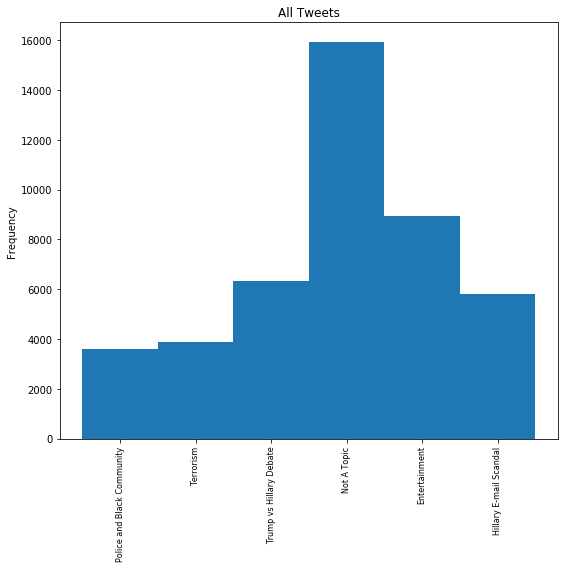

In [56]:
tweets = plot_topic_id_general(english_tweets ,dictionary, lda_model, topic_id_to_topic, topic_to_topic_id, min_prob=0.5)

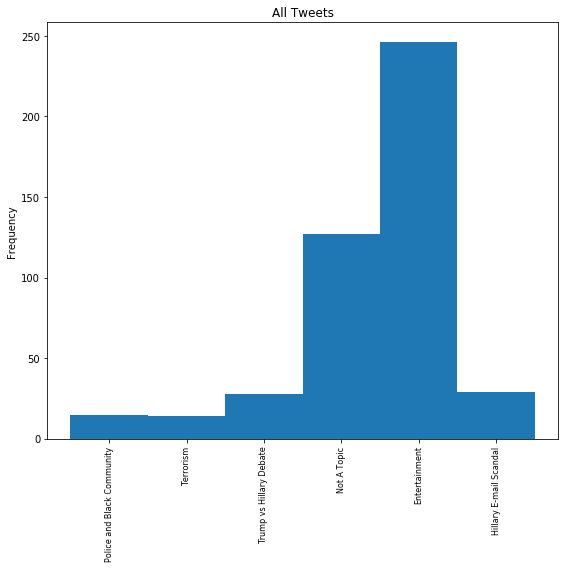

In [61]:
# remove not not topics
no_retweets = tweets[tweets['post_type'] != 'RETWEET']
no_retweets = plot_topic_id_general(no_retweets ,dictionary, lda_model, topic_id_to_topic, topic_to_topic_id, min_prob=0.5)

In [68]:
no_retweets.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,Cleaned Tweets,Topic Ids,Topics
6171,1.660771e+09,GARRETTSIMPSON_,#TrumpBaby https://t.co/36DYqKjS0B #TrumpForPr...,United States,English,2016-11-08,11/8/2016 18:16,1339,1587,2270,QUOTE_TWEET,Right,0,1,RightTroll,,4,Entertainment
6172,1.660771e+09,GARRETTSIMPSON_,#TheFixIsIn #NeverHillary #Rigged #DemExitNOW ...,United States,English,2016-11-08,11/8/2016 18:08,1339,1587,2271,QUOTE_TWEET,Right,0,1,RightTroll,,4,Entertainment
6202,1.660771e+09,GARRETTSIMPSON_,#HillaryForPrison2016 https://t.co/A6ikcbeplx ...,United States,English,2016-11-08,11/8/2016 21:36,1822,1655,2306,QUOTE_TWEET,Right,0,1,RightTroll,,4,Entertainment
37119,1.677049e+09,GWENNYTHOT,#PoppyMurray https://t.co/ZTgCeD4naJ,United States,English,2016-10-15,10/15/2016 20:41,876,1060,2390,QUOTE_TWEET,left,0,1,LeftTroll,,4,Entertainment
56221,2.535819e+09,HAPPKENDRAHAPPY,"Voter fraud is real, and it’s happening now #V...",United States,English,2016-10-16,10/16/2016 15:48,1309,1681,2630,QUOTE_TWEET,Right,0,1,RightTroll,voter fraud real happening,2,Trump vs Hillary Debate


In [73]:
no_retweets['Cleaned Tweets'] = no_retweets['Cleaned Tweets'].apply(lambda x: np.nan if not x else x)
no_retweets.dropna(subset=['Cleaned Tweets'], inplace=True)
no_retweets.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,Cleaned Tweets,Topic Ids,Topics
56221,2.535819e+09,HAPPKENDRAHAPPY,"Voter fraud is real, and it’s happening now #V...",United States,English,2016-10-16,10/16/2016 15:48,1309,1681,2630,QUOTE_TWEET,Right,0,1,RightTroll,voter fraud real happening,2,Trump vs Hillary Debate
57071,2.535819e+09,HAPPKENDRAHAPPY,This is Trump beating the Mainstream media #ma...,United States,English,2016-11-08,11/8/2016 17:40,1305,1688,3033,QUOTE_TWEET,Right,0,1,RightTroll,trump beating mainstream medium,3,Not A Topic
57082,2.535819e+09,HAPPKENDRAHAPPY,IQ<80 = Clinton. >80 = #TrumpPence16 #America...,United States,English,2016-11-08,11/8/2016 19:00,1305,1689,3045,QUOTE_TWEET,Right,0,1,RightTroll,clinton,5,Hillary E-mail Scandal
57109,2.535819e+09,HAPPKENDRAHAPPY,#ImVotingBecause I want to see ➡ #HillaryForPr...,United States,English,2016-11-08,11/8/2016 21:55,1797,1773,3077,QUOTE_TWEET,Right,0,1,RightTroll,want see,2,Trump vs Hillary Debate
71336,2.540882e+09,HEYITS_TOBY,#MAGA #Trump #Trump2016 #MakeAmericaGreatAgain...,United States,English,2016-11-08,11/8/2016 23:19,1674,1445,1459,QUOTE_TWEET,Right,0,1,RightTroll,important,3,Not A Topic


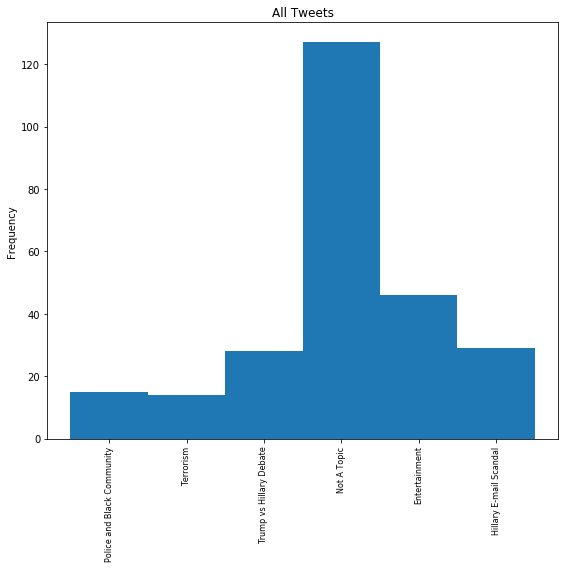

In [74]:
no_retweets = plot_topic_id_general(no_retweets ,dictionary, lda_model, topic_id_to_topic, topic_to_topic_id, min_prob=0.5)

In [75]:
# load model
MODEL_DATA_PATH = access_folder('models')
old_lda_model = gensim.models.LdaMulticore.load(MODEL_DATA_PATH + 'full_model')
old_dictionary = corpora.Dictionary.load(MODEL_DATA_PATH + 'full_model.id2word')

In [90]:
old_topic_id_to_topic = {0:'General Crime', 1:'Race', 2:'Random Things', 3:'Defense',
                     4:'Election Candidates', 5:'Weather/Holidays',
                    6:'Feelings', 7:'Mood', 8:'Social Media and News Related', 9:'Sexual Crime', 10:'Foreign Millitary Policy' ,
                     11:'Democratic Party', 12:'News Events',
                    13:'Random Thoughts', 14:'Event Related', 15:'Sport', 16:'Positivity', 17:'Wishes/Opinions',
                     18:'Immigration', 19:'Pro Trump - Anti Hillary'}
old_topic_to_topic_id  = {v: k for k, v in topic_id_to_topic.items()}

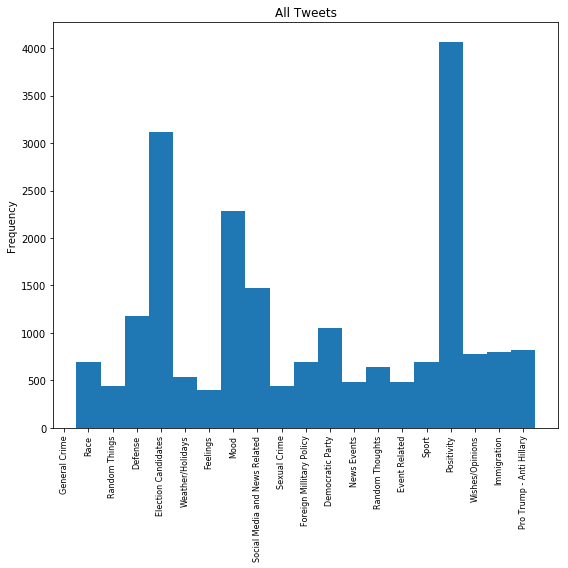

In [91]:
_ = plot_topic_id_general(english_tweets ,old_dictionary, old_lda_model, old_topic_id_to_topic, old_topic_to_topic_id, min_prob=0.5)

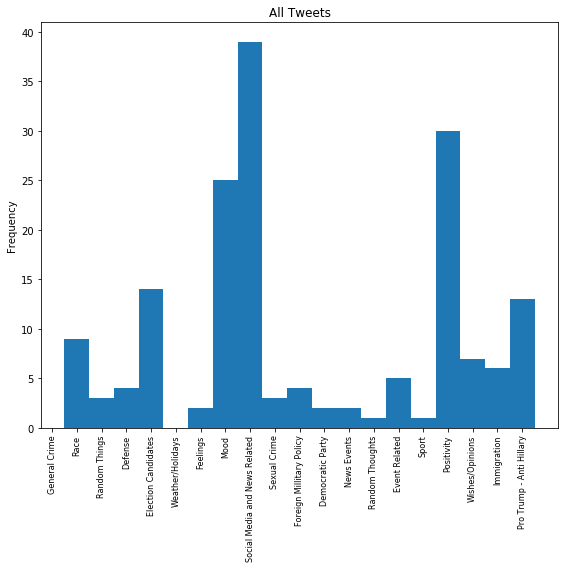

In [92]:
_ = plot_topic_id_general(no_retweets ,old_dictionary, old_lda_model, old_topic_id_to_topic, old_topic_to_topic_id, min_prob=0.5)

In [87]:
weather = pd.read_csv(GENERATED_DATA_PATH + 'weatherstuff.csv')
weather

,Unnamed: 0,content,followers,account_category
0,6034,Anthem singer at Heat-76ers game kneels during...,4708,LeftTroll
1,11391,Spent the afternoon with my friend @LewisHowes...,59,NonEnglish
2,11411,weather *drops below 70* me *whispers* christmas,61,NonEnglish
3,13328,Floridians warned that Hurricane Matthew could...,1052,LeftTroll
4,13349,ha hulu abc gross ugh blackish tracee ellis ro...,1052,LeftTroll
5,13355,Matthew strengthens to Cat 4 hurricane,1053,LeftTroll
6,13367,Hurricane Upgraded to Category 4 as Millions W...,1053,LeftTroll
7,13372,In Haiti Slow Revelations About The Scale Of H...,1054,LeftTroll
8,13381,Half a Million Residents Ordered to Flee Georg...,1054,LeftTroll
9,13384,Hurricane Matthew Strengthens to Category 4 St...,1054,LeftTroll


In [88]:
weather['Cleaned Tweets'] = clean_tweets(weather)

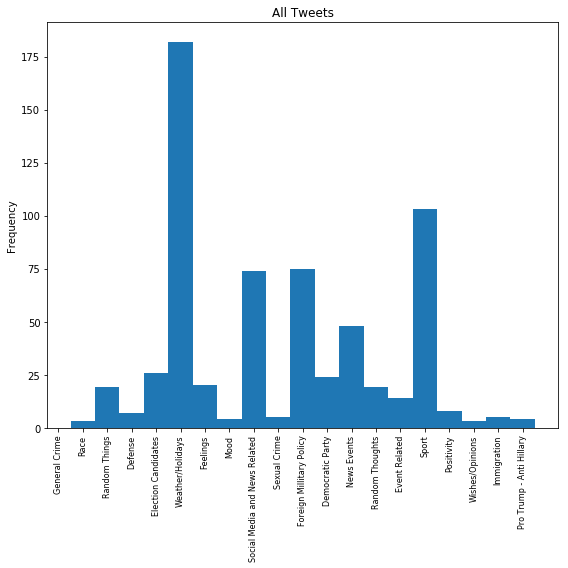

In [89]:
_ = plot_topic_id_general(weather ,old_dictionary, old_lda_model, old_topic_id_to_topic, old_topic_to_topic_id, min_prob=0.5)

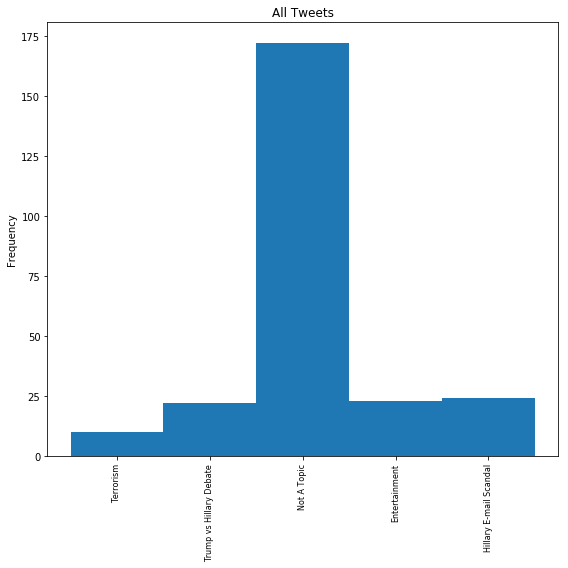

In [94]:
_ = plot_topic_id_general(weather ,dictionary, lda_model, topic_id_to_topic, topic_to_topic_id, min_prob=0.5)